In [1]:
import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from library.Tempotron import Tempotron
from library.comput_utils import acc_metrics
from library.script_wrappers import find_nidx_along_traj, datagen_jitter
from library.utils import save_pickle, load_pickle
from library.visualization import plot_popras


In [2]:
# ====================================== Global params and paths ==================================
# exintag = 'ex'
exintag = 'in'

data_dir = 'sim_results/fig6'
save_dir = 'sim_results/fig6/CheckTempotron_3traj/%s_w001_1spike_seed1'%(exintag)
os.makedirs(save_dir, exist_ok=True)
legendsize = 8
plt.rcParams.update({'font.size': legendsize,
                     "axes.titlesize": legendsize,
                     'axes.labelpad': 0,
                     'axes.titlepad': 0,
                     'xtick.major.pad': 0,
                     'ytick.major.pad': 0,
                     'axes.facecolor': 'w',

                     })


In [3]:
# ======================== Get data from storage =================
# exintags = ['ex', 'in']
if exintag == 'in':
    center_x, center_y = 0, 20
elif exintag == 'ex':
    center_x, center_y = 0, -20
else:
    raise ValueError

simdata = load_pickle(join(data_dir, 'fig6_%s.pkl'%(exintag)))


BehDF = simdata['BehDF']
SpikeDF = simdata['SpikeDF']
NeuronDF = simdata['NeuronDF']
MetaData = simdata['MetaData']
config_dict = simdata['Config']

theta_phase_plot = BehDF['theta_phase_plot']
traj_x = BehDF['traj_x'].to_numpy()
traj_y = BehDF['traj_y'].to_numpy()
traj_a = BehDF['traj_a'].to_numpy()
t = BehDF['t'].to_numpy()
theta_phase = BehDF['theta_phase'].to_numpy()

nn_ca3 = MetaData['nn_ca3']

xxtun1d = NeuronDF['neuronx'].to_numpy()
yytun1d = NeuronDF['neurony'].to_numpy()
aatun1d = NeuronDF['neurona'].to_numpy()


xxtun1d_ca3 = xxtun1d[:nn_ca3]
yytun1d_ca3 = yytun1d[:nn_ca3]
aatun1d_ca3 = aatun1d[:nn_ca3]
nx_ca3, ny_ca3 = config_dict['nx_ca3'], config_dict['ny_ca3']
xxtun2d_ca3 = xxtun1d_ca3.reshape(nx_ca3, nx_ca3)  # Assuming nx = ny
yytun2d_ca3 = yytun1d_ca3.reshape(nx_ca3, nx_ca3)  # Assuming nx = ny
aatun2d_ca3 = aatun1d_ca3.reshape(nx_ca3, nx_ca3)  # Assuming nx = ny

Ipos_max_compen = config_dict['Ipos_max_compen']
Iangle_diff = config_dict['Iangle_diff']
Iangle_kappa = config_dict['Iangle_kappa']
xmin, xmax, ymin, ymax = config_dict['xmin'], config_dict['xmax'], config_dict['ymin'], config_dict['ymax']
theta_f = config_dict['theta_f']  # in Hz
theta_T = 1/theta_f * 1e3  # in ms
dt = config_dict['dt']
traj_d = np.append(0, np.cumsum(np.sqrt(np.diff(traj_x)**2 + np.diff(traj_y)**2)))
SpikeDF['tsp'] = SpikeDF['tidxsp'].apply(lambda x : t[x])

Chosen trajectory types = [0, 6, 12]
Chosen trajectory angles = [0.0, 90.0, 180.0]
[4750 4751 4752 4753 4754 4755 4756 4757 4758 4759 4760 4761 4762 4763
 4764 4765 4766 4767 4768 4769]
[3959 4039 4119 4199 4279 4359 4439 4519 4599 4679 4759 4839 4919 4999
 5079 5159 5239 5319 5399 5479 5559]
[4750 4751 4752 4753 4754 4755 4756 4757 4758 4759 4760 4761 4762 4763
 4764 4765 4766 4767 4768 4769 3959 4039 4119 4199 4279 4359 4439 4519
 4599 4679 4839 4919 4999 5079 5159 5239 5319 5399 5479 5559]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29  9 30 31 32 33 34 35 36 37 38 39]
[3959 4039 4119 4199 4279 4359 4439 4519 4599 4679 4759 4839 4919 4999
 5079 5159 5239 5319 5399 5479 5559]


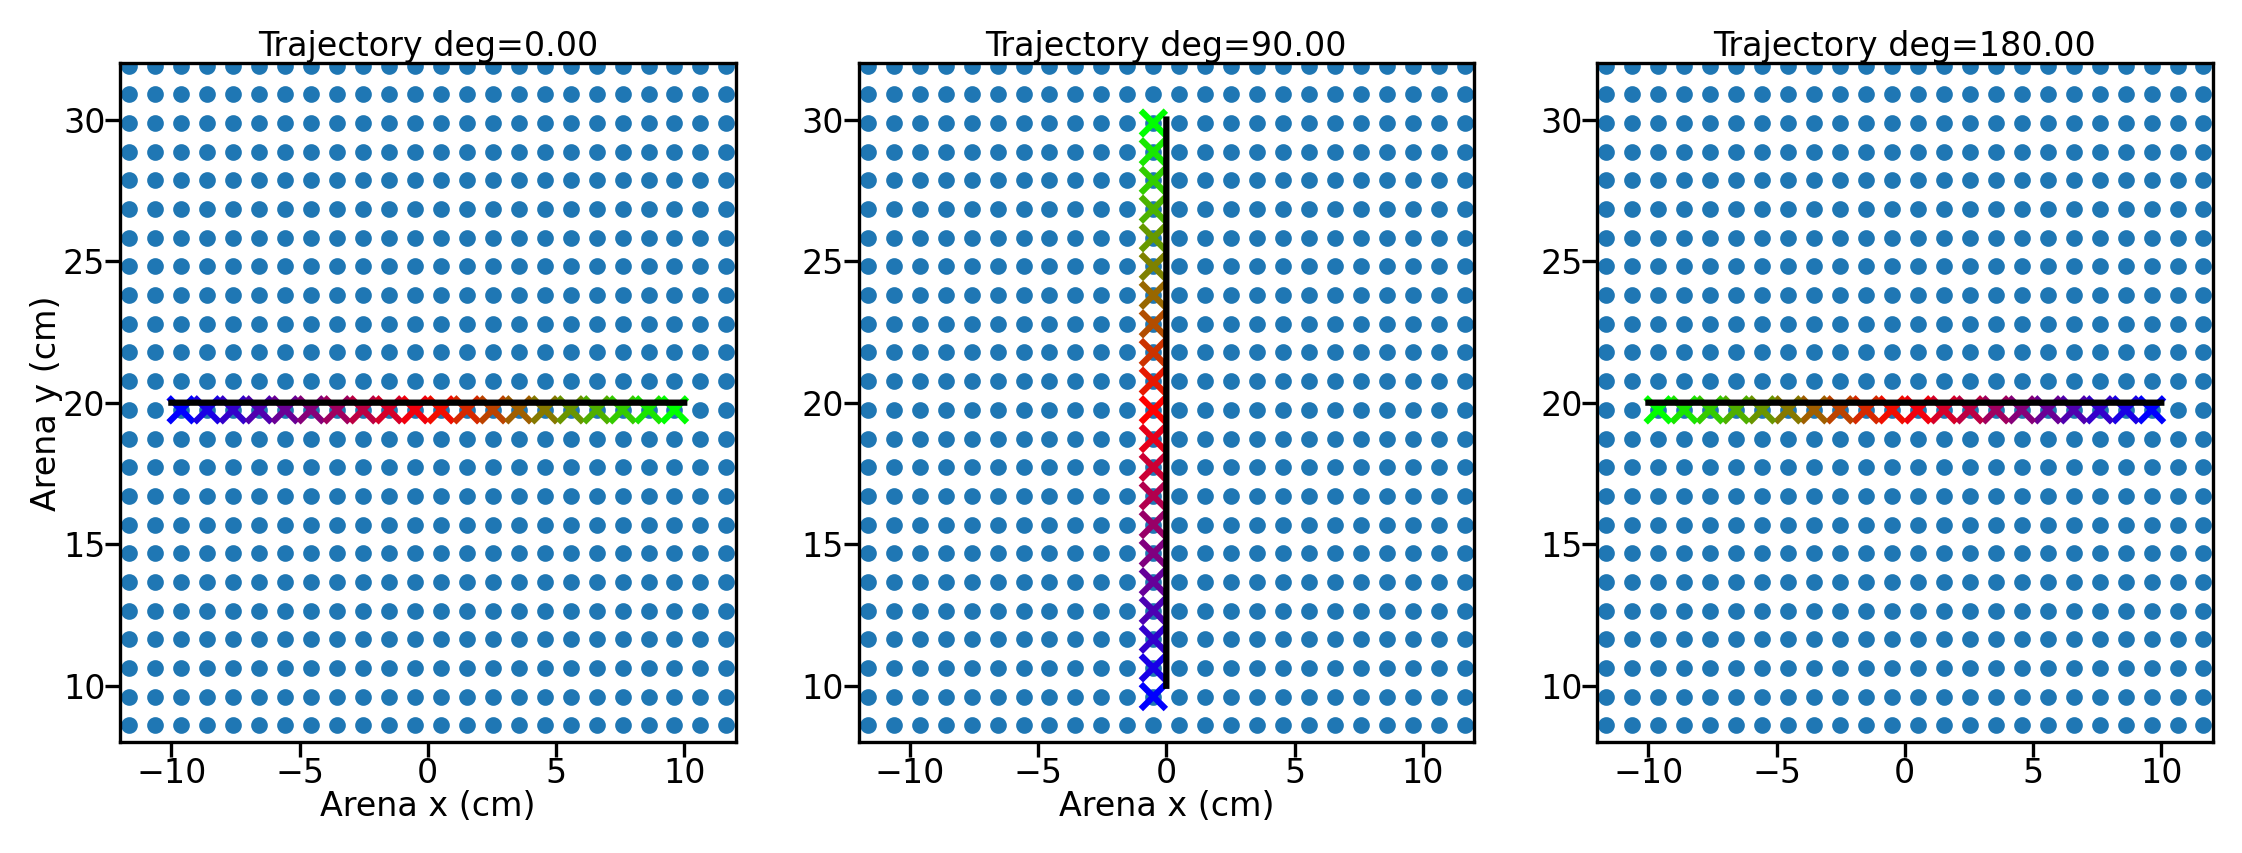

In [4]:

chosen_types = np.array([0, 6, 12])
chosen_degs = np.rad2deg(chosen_types / 24 * 2 * np.pi)
print('Chosen trajectory types = ' + str(list(chosen_types)))
print('Chosen trajectory angles = ' + str(list(chosen_degs)))

fig, ax = plt.subplots(1, 3, figsize=(9, 3), facecolor='w', dpi=300)
ax = ax.ravel()
all_nidx_alltrajs = []
for i in range(len(chosen_types)):
    chosen_type = chosen_types[i]

    BehDF_eachtraj = BehDF[BehDF['traj_type'] == chosen_type]
    traj_x_eachtraj = BehDF_eachtraj['traj_x'].to_numpy()
    traj_y_eachtraj = BehDF_eachtraj['traj_y'].to_numpy()
    allnidx_eachtraj = find_nidx_along_traj(traj_x_eachtraj, traj_y_eachtraj, xxtun1d_ca3, yytun1d_ca3)
    allnidx_eachtraj_idx = np.arange(allnidx_eachtraj.shape[0])
    if chosen_type in [3, 9, 15, 21]:
        allnidx_eachtraj = allnidx_eachtraj[(allnidx_eachtraj_idx % 2) == 0]
        allnidx_eachtraj_idx = np.arange(allnidx_eachtraj.shape[0])
    all_nidx_alltrajs.append(allnidx_eachtraj)

    ax[i].plot(traj_x_eachtraj, traj_y_eachtraj, c='k')
    ax[i].scatter(xxtun1d_ca3, yytun1d_ca3, marker='.')
    ax[i].scatter(xxtun1d_ca3[allnidx_eachtraj], yytun1d_ca3[allnidx_eachtraj], c=allnidx_eachtraj_idx, cmap='brg', marker='x')
    ax[i].set_xlim(-12, 12)
    ax[i].set_ylim(-12 + center_y, +12 + center_y)
    ax[i].set_title('Trajectory deg=%0.2f'%(np.rad2deg(chosen_type/24*2*np.pi)))

ax[0].set_xlabel('Arena x (cm)')
ax[1].set_xlabel('Arena x (cm)')
ax[0].set_ylabel('Arena y (cm)')


all_nidx = []
nidx2widx = []
for i in [0, 1]:  # indices of trajectories of the set of neurons that you want to put into the weight array
    all_nidx_eachtraj = all_nidx_alltrajs[i]
    if i == 0:
        all_nidx.extend(all_nidx_eachtraj)
        nidx2widx.append(np.arange(all_nidx_eachtraj.shape[0]))

    else:
        nidx2widx_tmp = np.zeros(len(all_nidx_eachtraj)).astype(int)
        for nj in range(len(all_nidx_eachtraj)):
            nidx = all_nidx_eachtraj[nj]

            if nidx not in all_nidx:
                all_nidx.extend([nidx])
                nidx2widx_tmp[nj] = len(all_nidx) - 1
            else:
                all_nidx_np = np.array(all_nidx)
                repeat_nidx_idx = np.where(nidx == all_nidx_np)[0][0]
                nidx2widx_tmp[nj] = repeat_nidx_idx

        nidx2widx.append(nidx2widx_tmp)
all_nidx = np.array(all_nidx)
all_nidx_alltrajs.pop(-1)
print(all_nidx_alltrajs[0])
print(all_nidx_alltrajs[1])
print(all_nidx)
print(nidx2widx[0])
print(nidx2widx[1])
print(all_nidx[nidx2widx[1]])


Current cycle 9

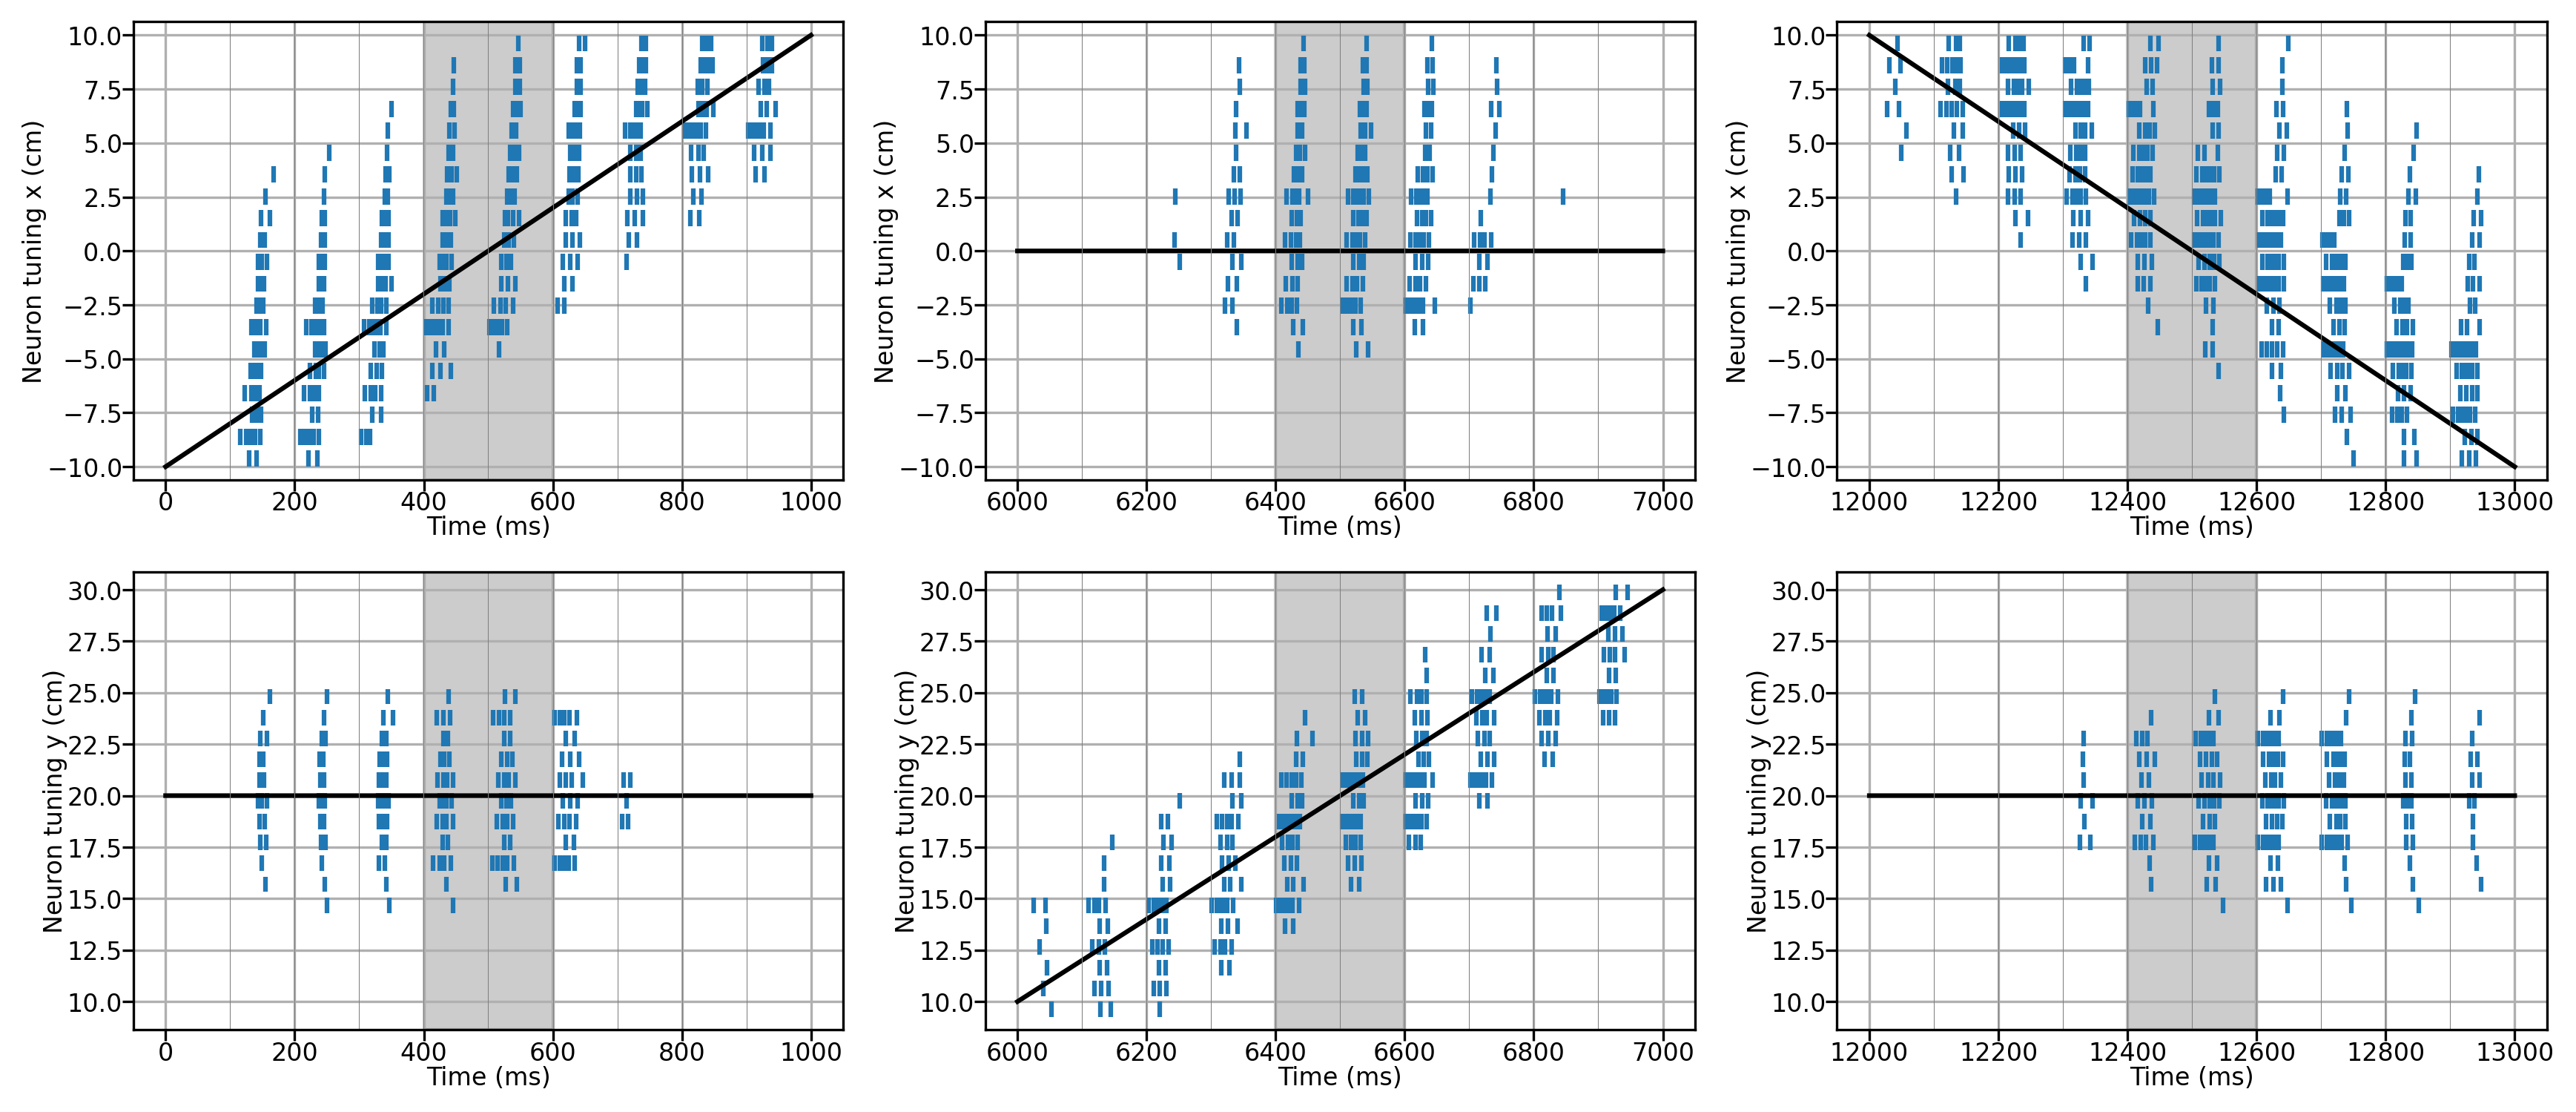

In [5]:
spdftmplist = []
for nidx in all_nidx:
    spdftmplist.append(SpikeDF[SpikeDF['neuronid'] == nidx])
SpikeDF_subset = pd.concat(spdftmplist, ignore_index=True)

data_M = []
label_M = []
trajtype= []
overlap_r = 2

fig, ax = plt.subplots(2, 3, figsize=(14, 6), facecolor='w', dpi=300)
for typei in range(len(chosen_types)):

    chosen_type = chosen_types[typei]
    BehDF_eachtraj = BehDF[BehDF['traj_type'] == chosen_type]
    traj_tindex = BehDF_eachtraj.index
    tidseg_min, tidseg_max = traj_tindex.min(), traj_tindex.max()
    tmin, tmax = BehDF_eachtraj.t.min(), BehDF_eachtraj.t.max()
    cycle_i = 0
    while (tmin + cycle_i * theta_T) < tmax:
        print('\rCurrent cycle %d'%(cycle_i), end='', flush=True)
        theta_tstart = tmin + cycle_i * theta_T
        theta_tend = tmin + (cycle_i + 1) * theta_T
        spdf_M = SpikeDF_subset[(SpikeDF_subset['tsp'] > theta_tstart) & (SpikeDF_subset['tsp'] <= theta_tend)]

        if spdf_M.shape[0] < 1:
            cycle_i += 1
            continue
        data_MN = []
        for nidxi in range(len(all_nidx)):
            nidx = all_nidx[nidxi]
            spdf_MN = spdf_M[spdf_M['neuronid'] == nidx]
            tsp = spdf_MN.tsp.to_numpy()
            if tsp.shape[0] > 1:
                tsp = np.array([tsp.min()])
            data_MN.append(tsp - theta_tstart)


        t_intheta = (t > theta_tstart) & (t <= theta_tend)
        # distance to the arena center
        traj_r = np.sqrt((traj_x[t_intheta]-center_x)** 2 + (traj_y[t_intheta]-center_y)** 2)
        r05 = np.median(traj_r)
        if r05 < overlap_r:
            label = True
        else:
            label = False

        data_M.append(data_MN)
        label_M.append(label)
        trajtype.append(chosen_type)
        cycle_i += 1

    for ni in range(len(all_nidx_alltrajs)):
        all_nidx_eachtraj = all_nidx_alltrajs[ni]

        for nidx in all_nidx_eachtraj:

            spdf_tmp_plot = SpikeDF_subset[(SpikeDF_subset['tsp'] > tmin) & (SpikeDF_subset['tsp'] <= tmax) & (SpikeDF_subset['neuronid'] == nidx)]
            tsp = spdf_tmp_plot.tsp.to_numpy()
            if ni == 1:
                ax[ni, typei].eventplot(tsp, lineoffset=yytun1d[nidx], linelength=0.75)
            else:
                ax[ni, typei].eventplot(tsp, lineoffset=xxtun1d[nidx], linelength=0.75)

        if ni == 1:
            ymin, ymax = yytun1d[all_nidx_eachtraj].min(),yytun1d[all_nidx_eachtraj].max()
            ax[ni, typei].plot(BehDF_eachtraj.t, BehDF_eachtraj.traj_y, c='k')
            ax[ni, typei].set_ylim(ymin-1, ymax+1)
            ax[ni, typei].set_ylabel('Neuron tuning y (cm)')
        else:
            xmin, xmax = xxtun1d[all_nidx_eachtraj].min(),xxtun1d[all_nidx_eachtraj].max()
            ax[ni, typei].plot(BehDF_eachtraj.t, BehDF_eachtraj.traj_x, c='k')
            ax[ni, typei].set_ylim(xmin-1, xmax+1)
            ax[ni, typei].set_ylabel('Neuron tuning x (cm)')


        traj_r_eachtraj = np.sqrt((BehDF_eachtraj.traj_x - center_x)**2 + (BehDF_eachtraj.traj_y - center_y)**2)
        t_tmp = BehDF_eachtraj['t'][traj_r_eachtraj < overlap_r]
        ax[ni, typei].axvspan(t_tmp.min(), t_tmp.max(), alpha=0.2, color='k')

        theta_cutidx = np.where(np.diff(theta_phase_plot[tidseg_min:tidseg_max]) < -6)[0]
        for thetai in theta_cutidx:
            ax[ni, typei].axvline(t[tidseg_min:tidseg_max][thetai], c='gray', linewidth=0.25)
        ax[ni, typei].set_xlabel('Time (ms)')
        ax[ni, typei].grid()

fig.savefig(join(save_dir, '%s_ras.png'%(exintag)), dpi=300)


In [6]:
trajtype = np.array(trajtype)
labels = np.array(label_M)
train_idx = np.where(trajtype == 0)[0].astype(int)
test_idx = np.where((trajtype == 6) | (trajtype == 12))[0].astype(int)
X_train_ori = np.array([data_M[i] for i in train_idx], dtype=object)
X_test_ori = np.array([data_M[i] for i in test_idx], dtype=object)
Y_train_ori = labels[train_idx]
Y_test_ori = labels[test_idx]
trajtype_train_ori = trajtype[train_idx]
trajtype_test_ori = trajtype[test_idx]

Training data = 180
True = 40 
False = 140
Testing data = 400
True = 80 
False = 320


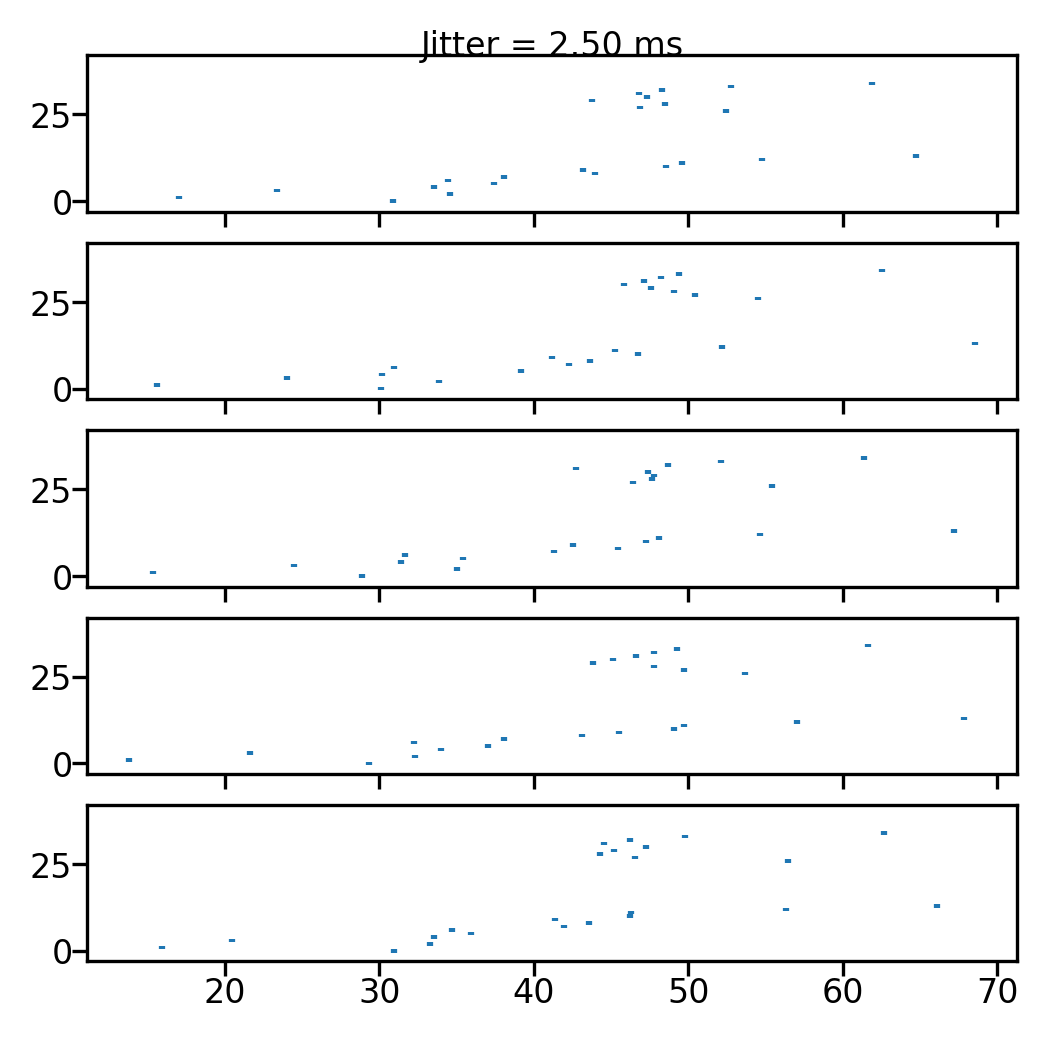

In [7]:
jitter_ms = 2.5
X_train, Y_train, trajtype_train = datagen_jitter(X_train_ori, Y_train_ori, trajtype_train_ori, 20, theta_T, jitter_ms=jitter_ms)
X_test, Y_test, trajtype_test = datagen_jitter(X_test_ori, Y_test_ori, trajtype_test_ori, 20, theta_T, jitter_ms=jitter_ms)

print('Training data = %d'%(X_train.shape[0]))
print('True = %d \nFalse = %d'%(Y_train.sum(), Y_train.shape[0]-Y_train.sum()))

print('Testing data = %d'%(X_test.shape[0]))
print('True = %d \nFalse = %d'%(Y_test.sum(), Y_test.shape[0]-Y_test.sum()))

mi = 0
fig, ax = plt.subplots(5, 1, sharex=True, facecolor='w', dpi=300, figsize=(4, 4))
ax[0].set_title('Jitter = %0.2f ms'%jitter_ms)
for ji in range(5):
    _ = ax[ji].eventplot(X_train[mi+ji])
fig.savefig(join(save_dir, '%s_jitter.png'%(exintag)), dpi=300)

In [8]:
num_iter = 500
Vthresh = 2
tau = 5
tau_s = tau/4
w_seed = 1
dt = 0.1
lr = 0.01
temN_tax = np.arange(0, 100, dt)
N = len(data_M[0])

temN = Tempotron(N=N, lr=lr, Vthresh=Vthresh, tau=tau, tau_s=tau_s, w_seed=w_seed)

ACC_train_list, TPR_train_list, TNR_train_list = [], [], []
ACC_test_list, TPR_test_list, TNR_test_list = [], [], []
w_train_list = []

for Y_train_pred, wTMP in temN.train(X_train, Y_train, temN_tax, num_iter=num_iter, progress=True, X_test=X_test, Y_test=Y_test):

    Y_test_pred, _, _, (ACC_test, TPR_test, TNR_test) = temN.predict(X_test, temN_tax, Y_test)


    ACC_train, TPR_train, TNR_train = acc_metrics(Y_train, Y_train_pred)

    ACC_train_list.append(ACC_train)
    TPR_train_list.append(TPR_train)
    TNR_train_list.append(TNR_train)
    ACC_test_list.append(ACC_test)
    TPR_test_list.append(TPR_test)
    TNR_test_list.append(TNR_test)
    w_train_list.append(wTMP)
all_w_train = np.stack(w_train_list).T

 Iter 440/500: Correct trials 180/180 = 1.000

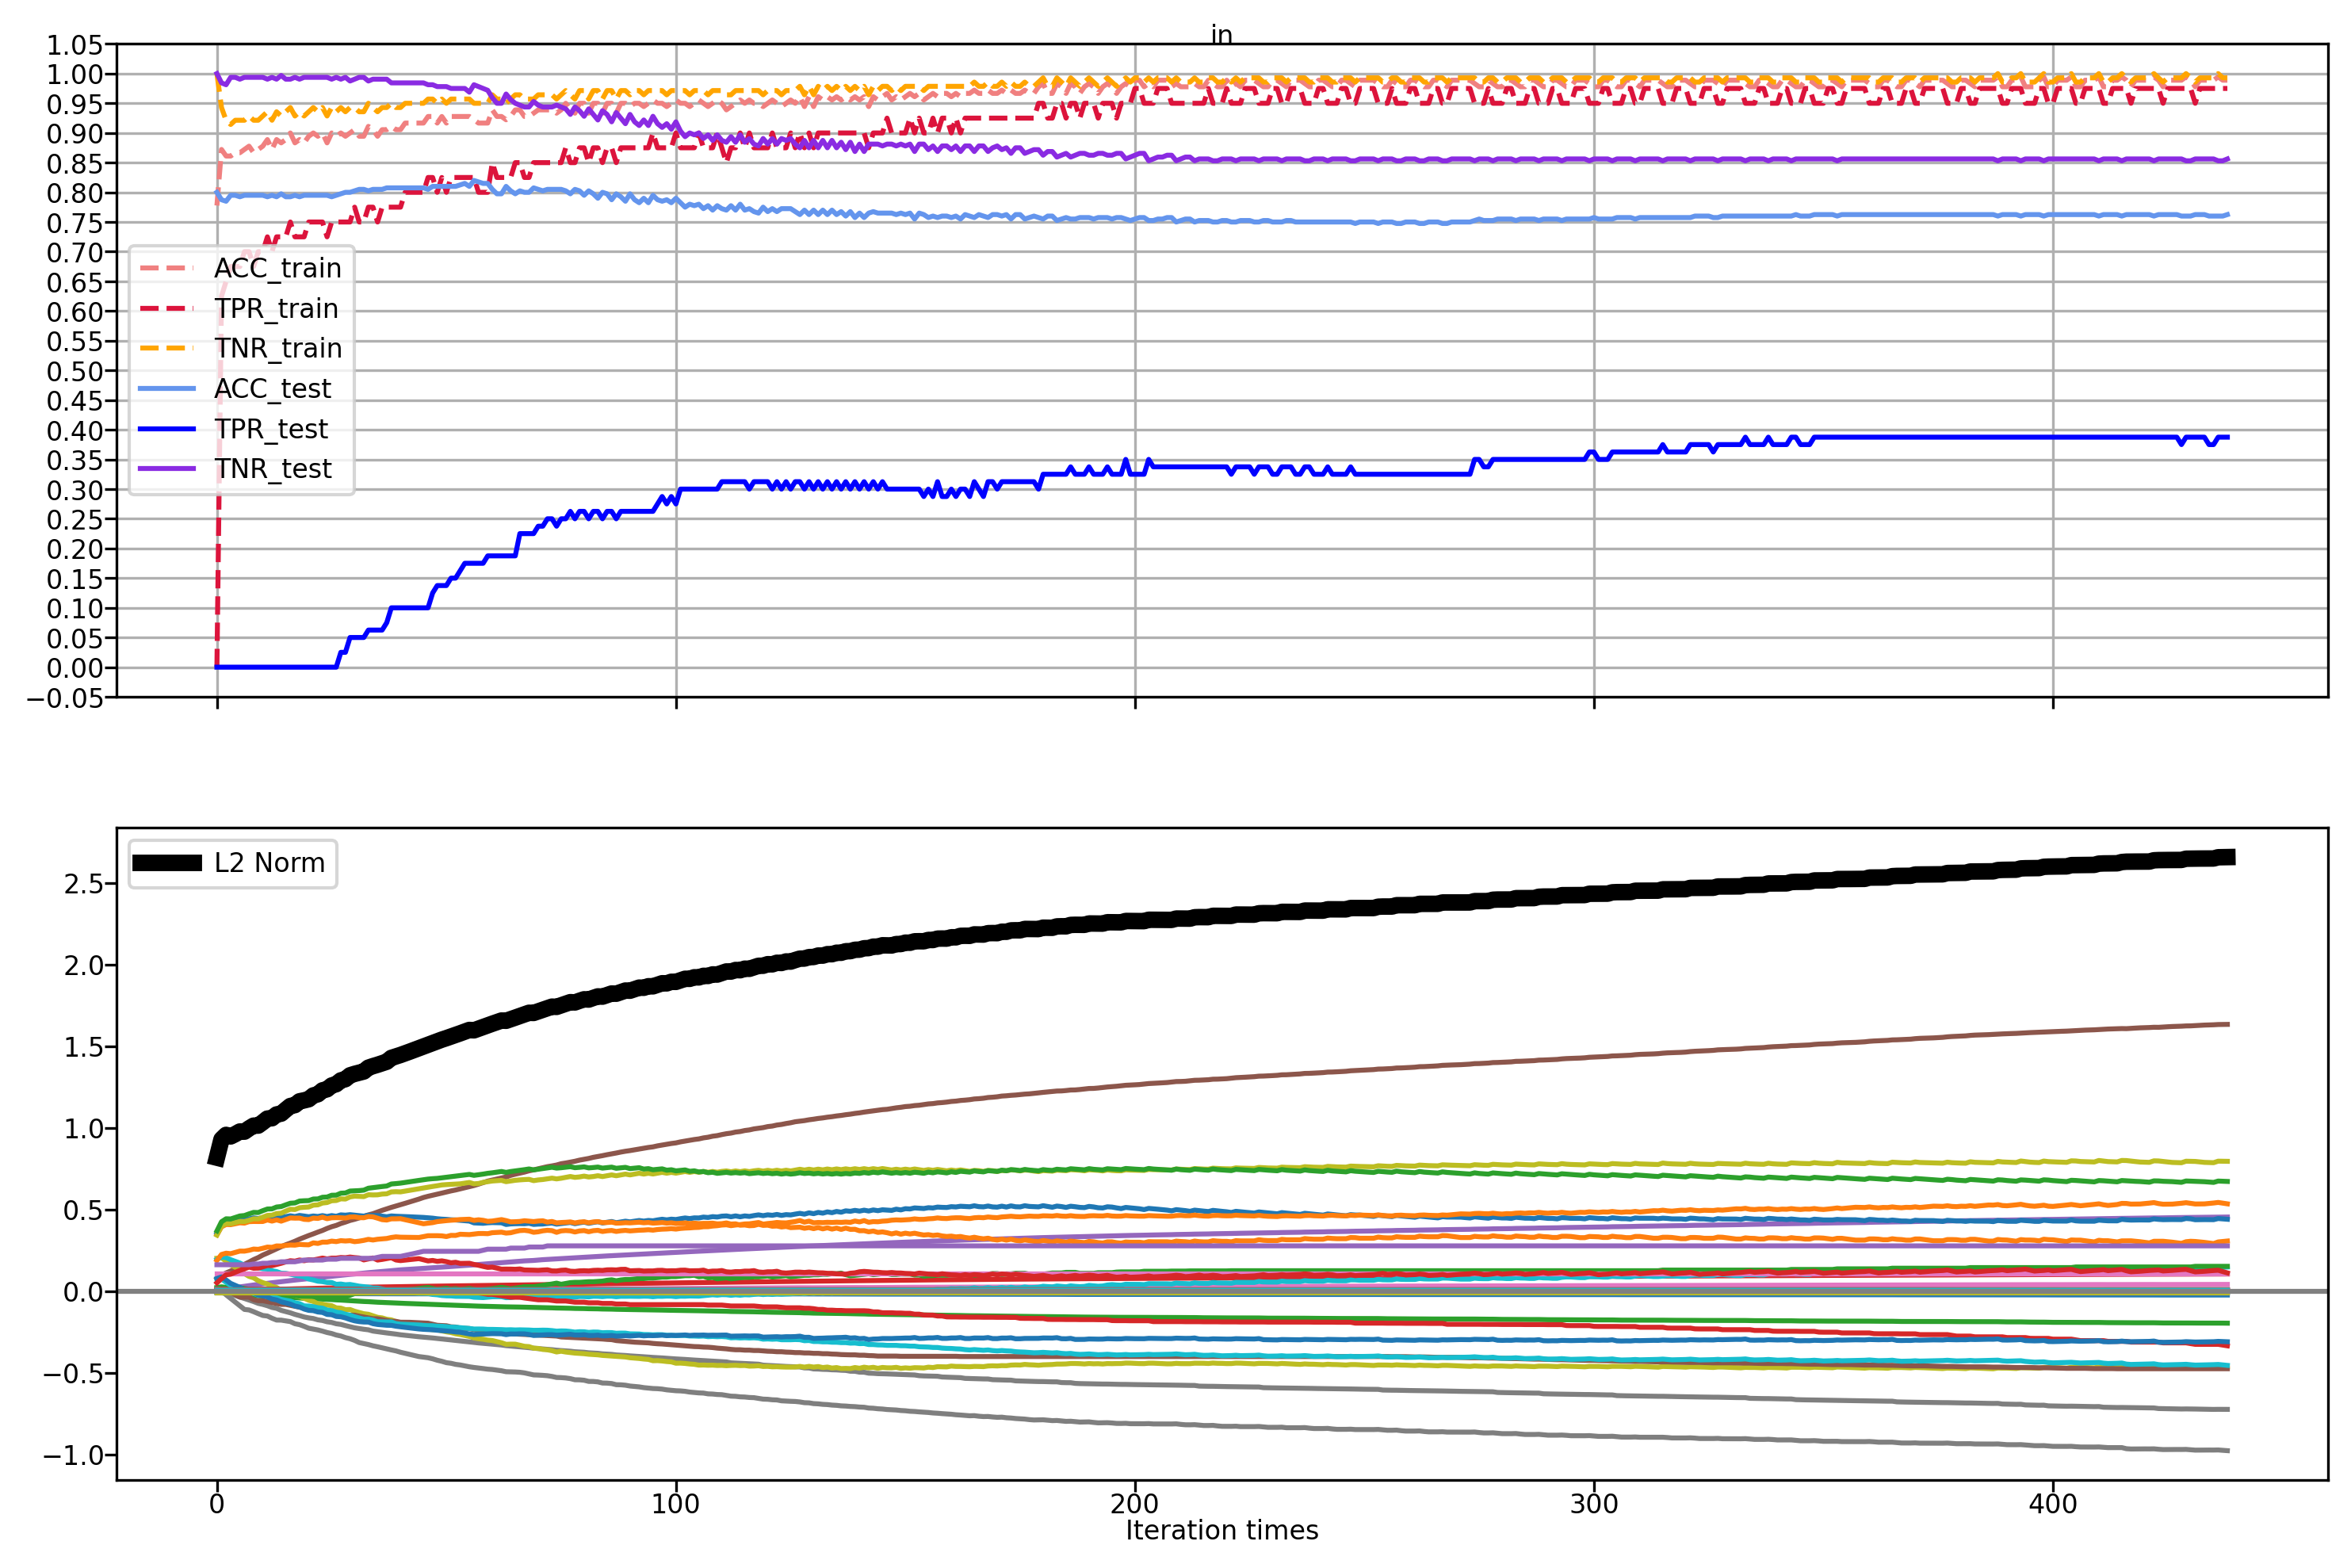

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=300, facecolor='w', sharex=True)
ax[0].plot(ACC_train_list, label='ACC_train', linestyle='dashed', color='lightcoral')
ax[0].plot(TPR_train_list, label='TPR_train', linestyle='dashed', color='crimson')
ax[0].plot(TNR_train_list, label='TNR_train', linestyle='dashed', color='orange')
ax[0].plot(ACC_test_list, label='ACC_test', color='cornflowerblue')
ax[0].plot(TPR_test_list, label='TPR_test', color='blue')
ax[0].plot(TNR_test_list, label='TNR_test', color='blueviolet')
# ax[0].set_ylim(-0.05, 1.05)
ax[0].set_yticks(np.arange(-0.05, 1.1, 0.05))
# ax[0].set_yticks(np.arange(0, 1, 0.05), minor=True)
ax[0].grid()
ax[0].set_title('%s'%(exintag))
ax[0].legend()

for i in range(all_w_train.shape[0]):
    ax[1].plot(all_w_train[i, :])
ax[1].plot(np.linalg.norm(all_w_train, axis=0), label='L2 Norm', color='k', linewidth=5)
ax[1].axhline(0, color='gray')
ax[1].legend()
ax[1].set_xlabel('Iteration times')

fig.savefig(join(save_dir, '%s_training.png'%(exintag)), dpi=300)



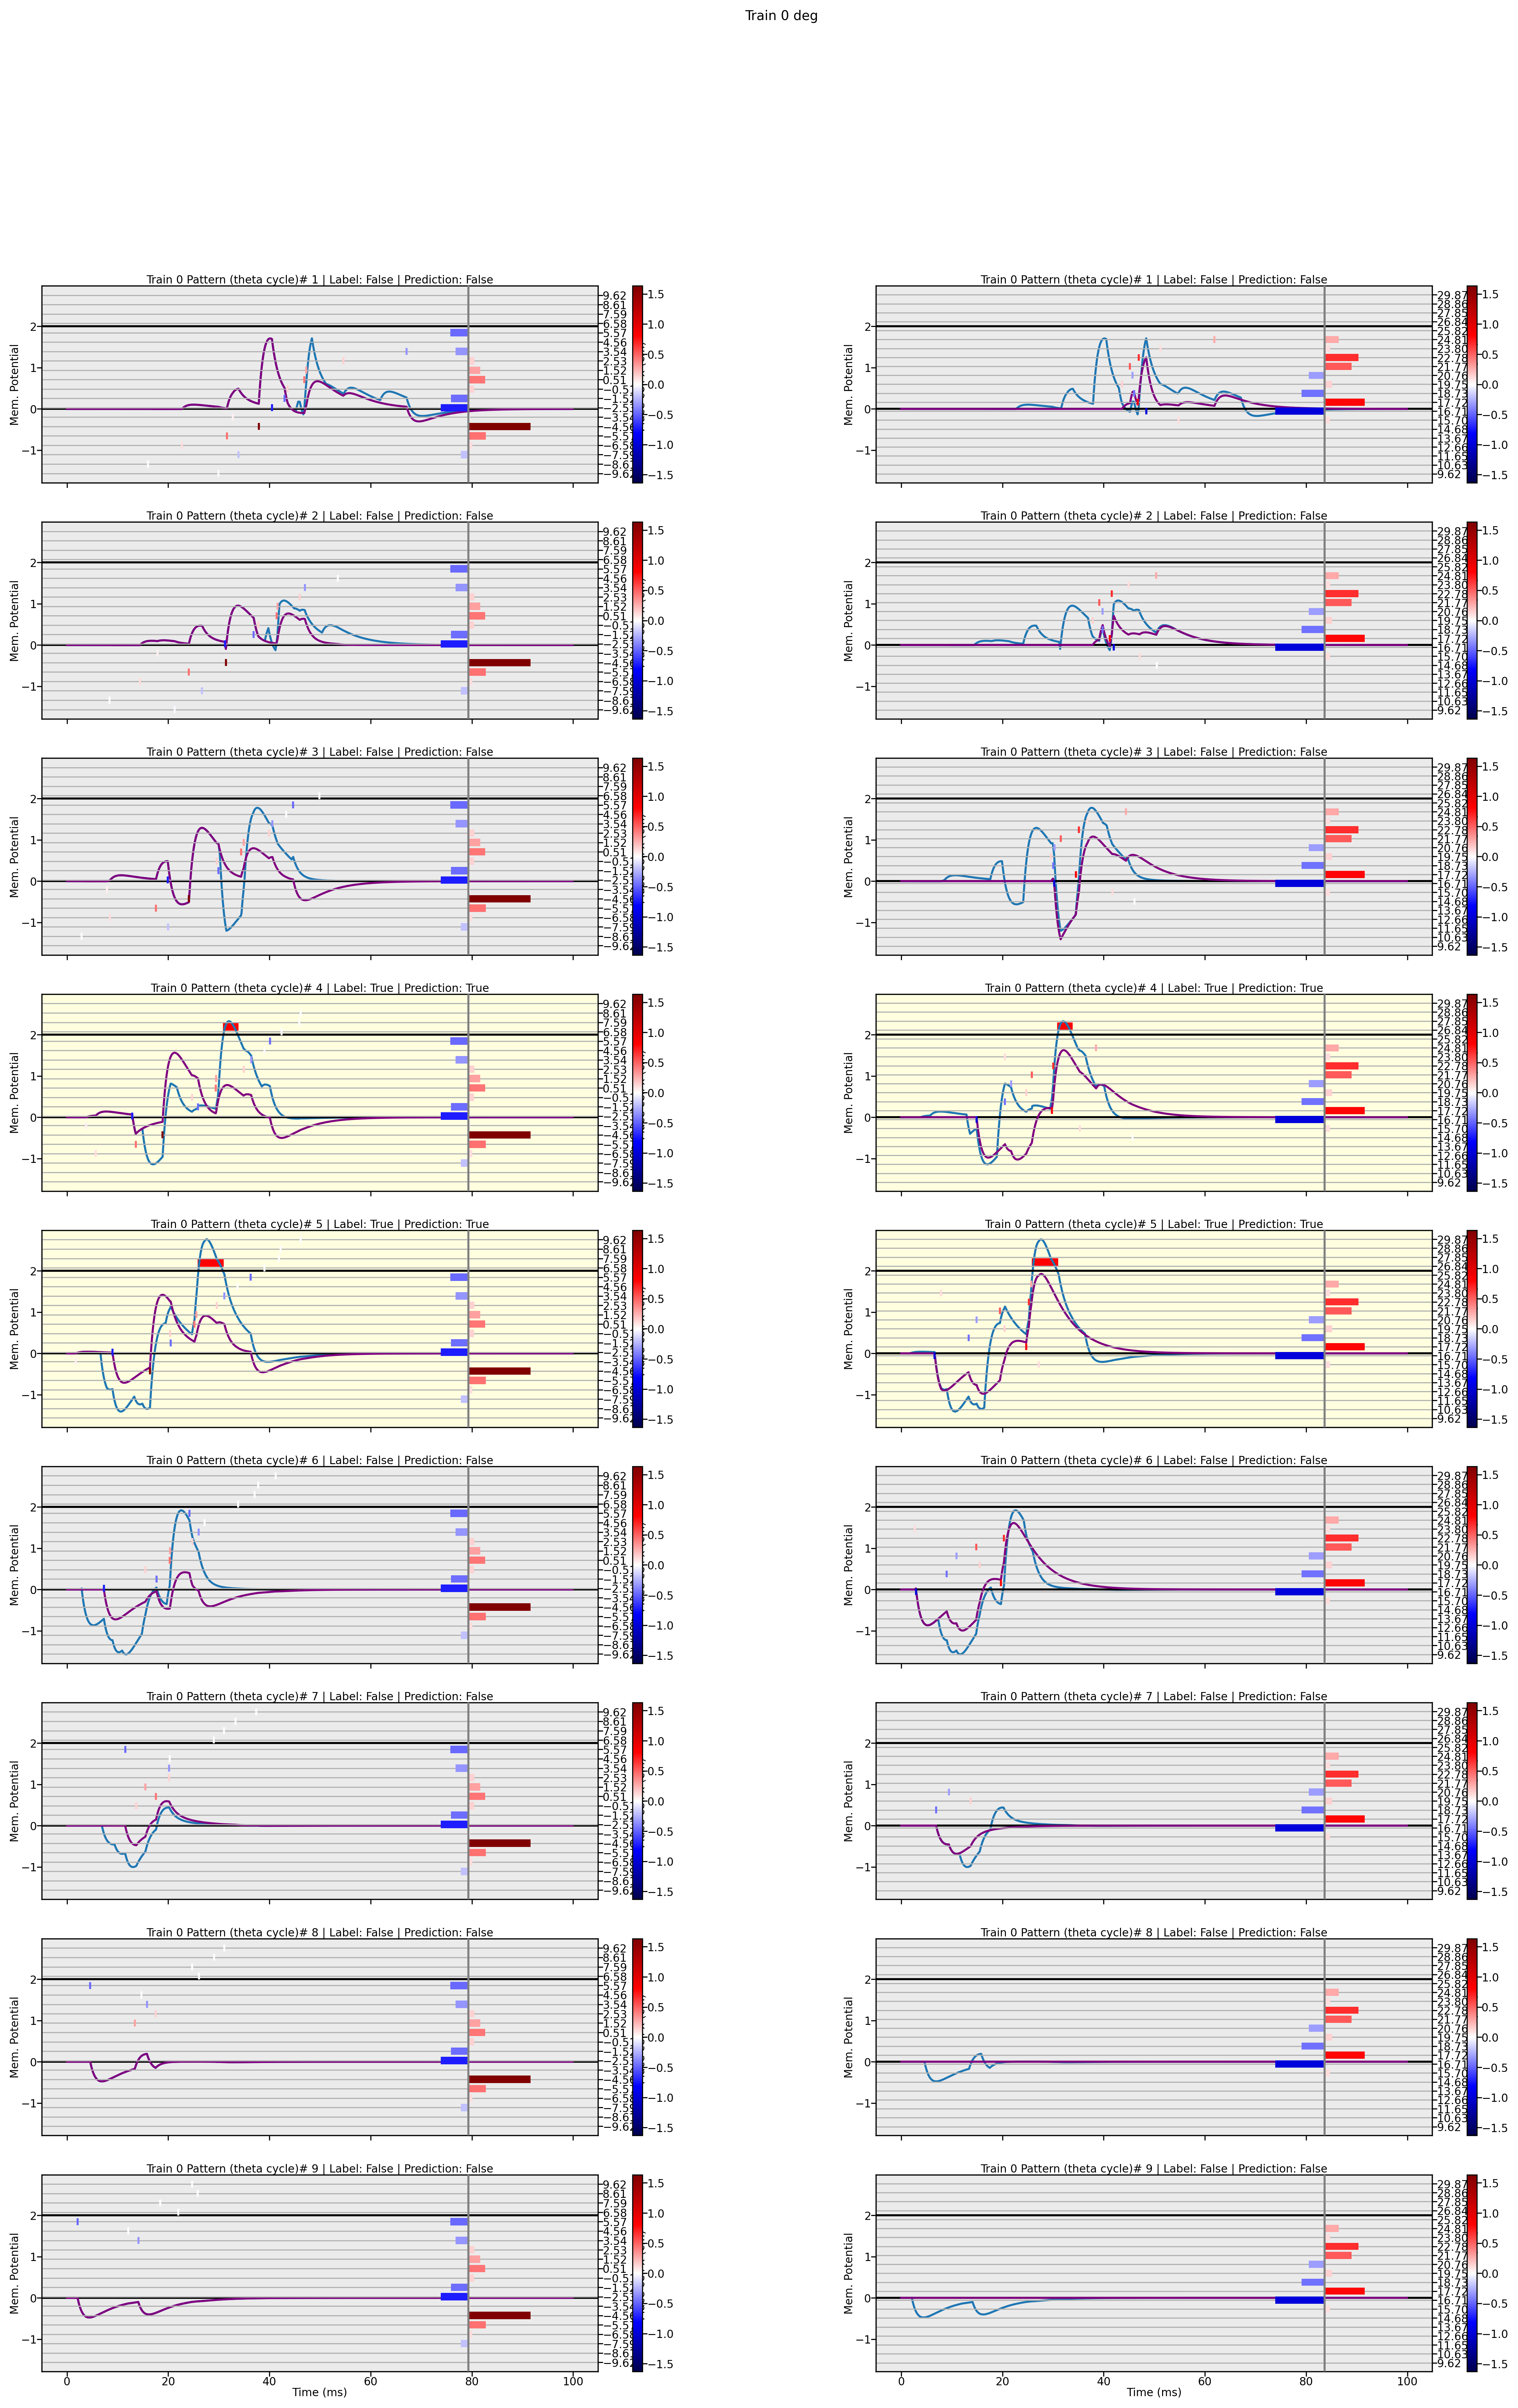

In [10]:
import matplotlib as mpl
import matplotlib.cm as cm
wmin, wmax = temN.w.min(), temN.w.max()
abswmax = max(np.abs(wmin), np.abs(wmax))
norm = mpl.colors.Normalize(vmin=-abswmax, vmax=abswmax)
val2cmap = cm.ScalarMappable(norm=norm, cmap=cm.seismic)



def plot_tempotron_traces(ax, temN, see_X, see_Y, see_Y_pred, see_tspout, see_kout, temN_tax, Vthresh, nidx2widx,
                          neuron_w, neuron_tun, val2cmap, tag, linelength=0.75):
    N = len(nidx2widx)

    for i in range(len(see_kout)):
        kout_sep = np.zeros(temN_tax.shape[0])
        ax[i].plot(temN_tax, see_kout[i])
        ax[i].axhline(Vthresh, color='k')
        ax[i].axhline(0, color='k')
        if see_Y[i]:
            ax[i].set_facecolor('lightyellow')
        else:
            ax[i].set_facecolor('0.92')

        ax_sp = ax[i].twinx()
        for nj in range(N):
            widx = nidx2widx[nj]
            tsp = see_X[i][widx]
            ax_sp.eventplot(tsp, lineoffset=neuron_tun[nj], linelength=linelength, color=val2cmap.to_rgba(neuron_w[nj]))
            if tsp.shape[0] > 0:
                kout_sep_tmp = temN.kern.getk(temN_tax.reshape(1, -1), tsp.reshape(-1, 1)) * neuron_w[nj]
                kout_sep += np.sum(kout_sep_tmp, axis=0)
        ax_sp.set_ylim(neuron_tun.min()-1, neuron_tun.max()+1)
        ax_sp.set_yticks(np.around(neuron_tun, 2))
        ax_sp.set_ylabel('Place cell x (cm) ')
        ax_sp.grid()
        ax[i].eventplot(see_tspout[i], lineoffsets=2.2, linelengths=0.2, color='r')
        ax[i].plot(temN_tax, kout_sep, c='purple')
        ax[i].set_title('%s Pattern (theta cycle)# %d | Label: %s | Prediction: %s' %(tag, i+1, see_Y[i], see_Y_pred[i]))
        ax[i].set_ylabel('Mem. Potential')

        left, bottom, width, height = ax[i].get_position().bounds
        ax_w = fig.add_axes([left+0.2, bottom, 0.05, height])
        ax_w.barh(neuron_tun, neuron_w, color=val2cmap.to_rgba(neuron_w))
        ax_w.axvline(0, color='gray')
        ax_w.set_yticks(np.around(neuron_tun, 2))
        ax_w.axis('off')
        ax_w.set_ylim(neuron_tun.min()-1, neuron_tun.max()+1)

        plt.colorbar(val2cmap, ax=ax[i])
    ax[i].set_xlabel('Time (ms)')
    return None

Y_pred_train_ori, kout_train_ori, tspout_train_ori, _ = temN.predict(X_train_ori, temN_tax)
fig, ax = plt.subplots(len(kout_train_ori), 2, sharex='col', sharey='col', figsize=(20, 28), facecolor='white', dpi=300)
plot_tempotron_traces(ax[:, 0], temN, X_train_ori, Y_train_ori, Y_pred_train_ori, tspout_train_ori, kout_train_ori,
                      temN_tax, Vthresh, nidx2widx[0], temN.w[nidx2widx[0]], xxtun1d[all_nidx_alltrajs[0]], val2cmap=val2cmap, tag='Train 0', linelength=0.75)
plot_tempotron_traces(ax[:, 1], temN, X_train_ori, Y_train_ori, Y_pred_train_ori, tspout_train_ori, kout_train_ori,
                      temN_tax, Vthresh, nidx2widx[1], temN.w[nidx2widx[1]], yytun1d[all_nidx_alltrajs[1]], val2cmap=val2cmap, tag='Train 0', linelength=0.75)
fig.suptitle('Train 0 deg')
fig.savefig(join(save_dir, '%s_train_trace.png'%(exintag)), dpi=300)


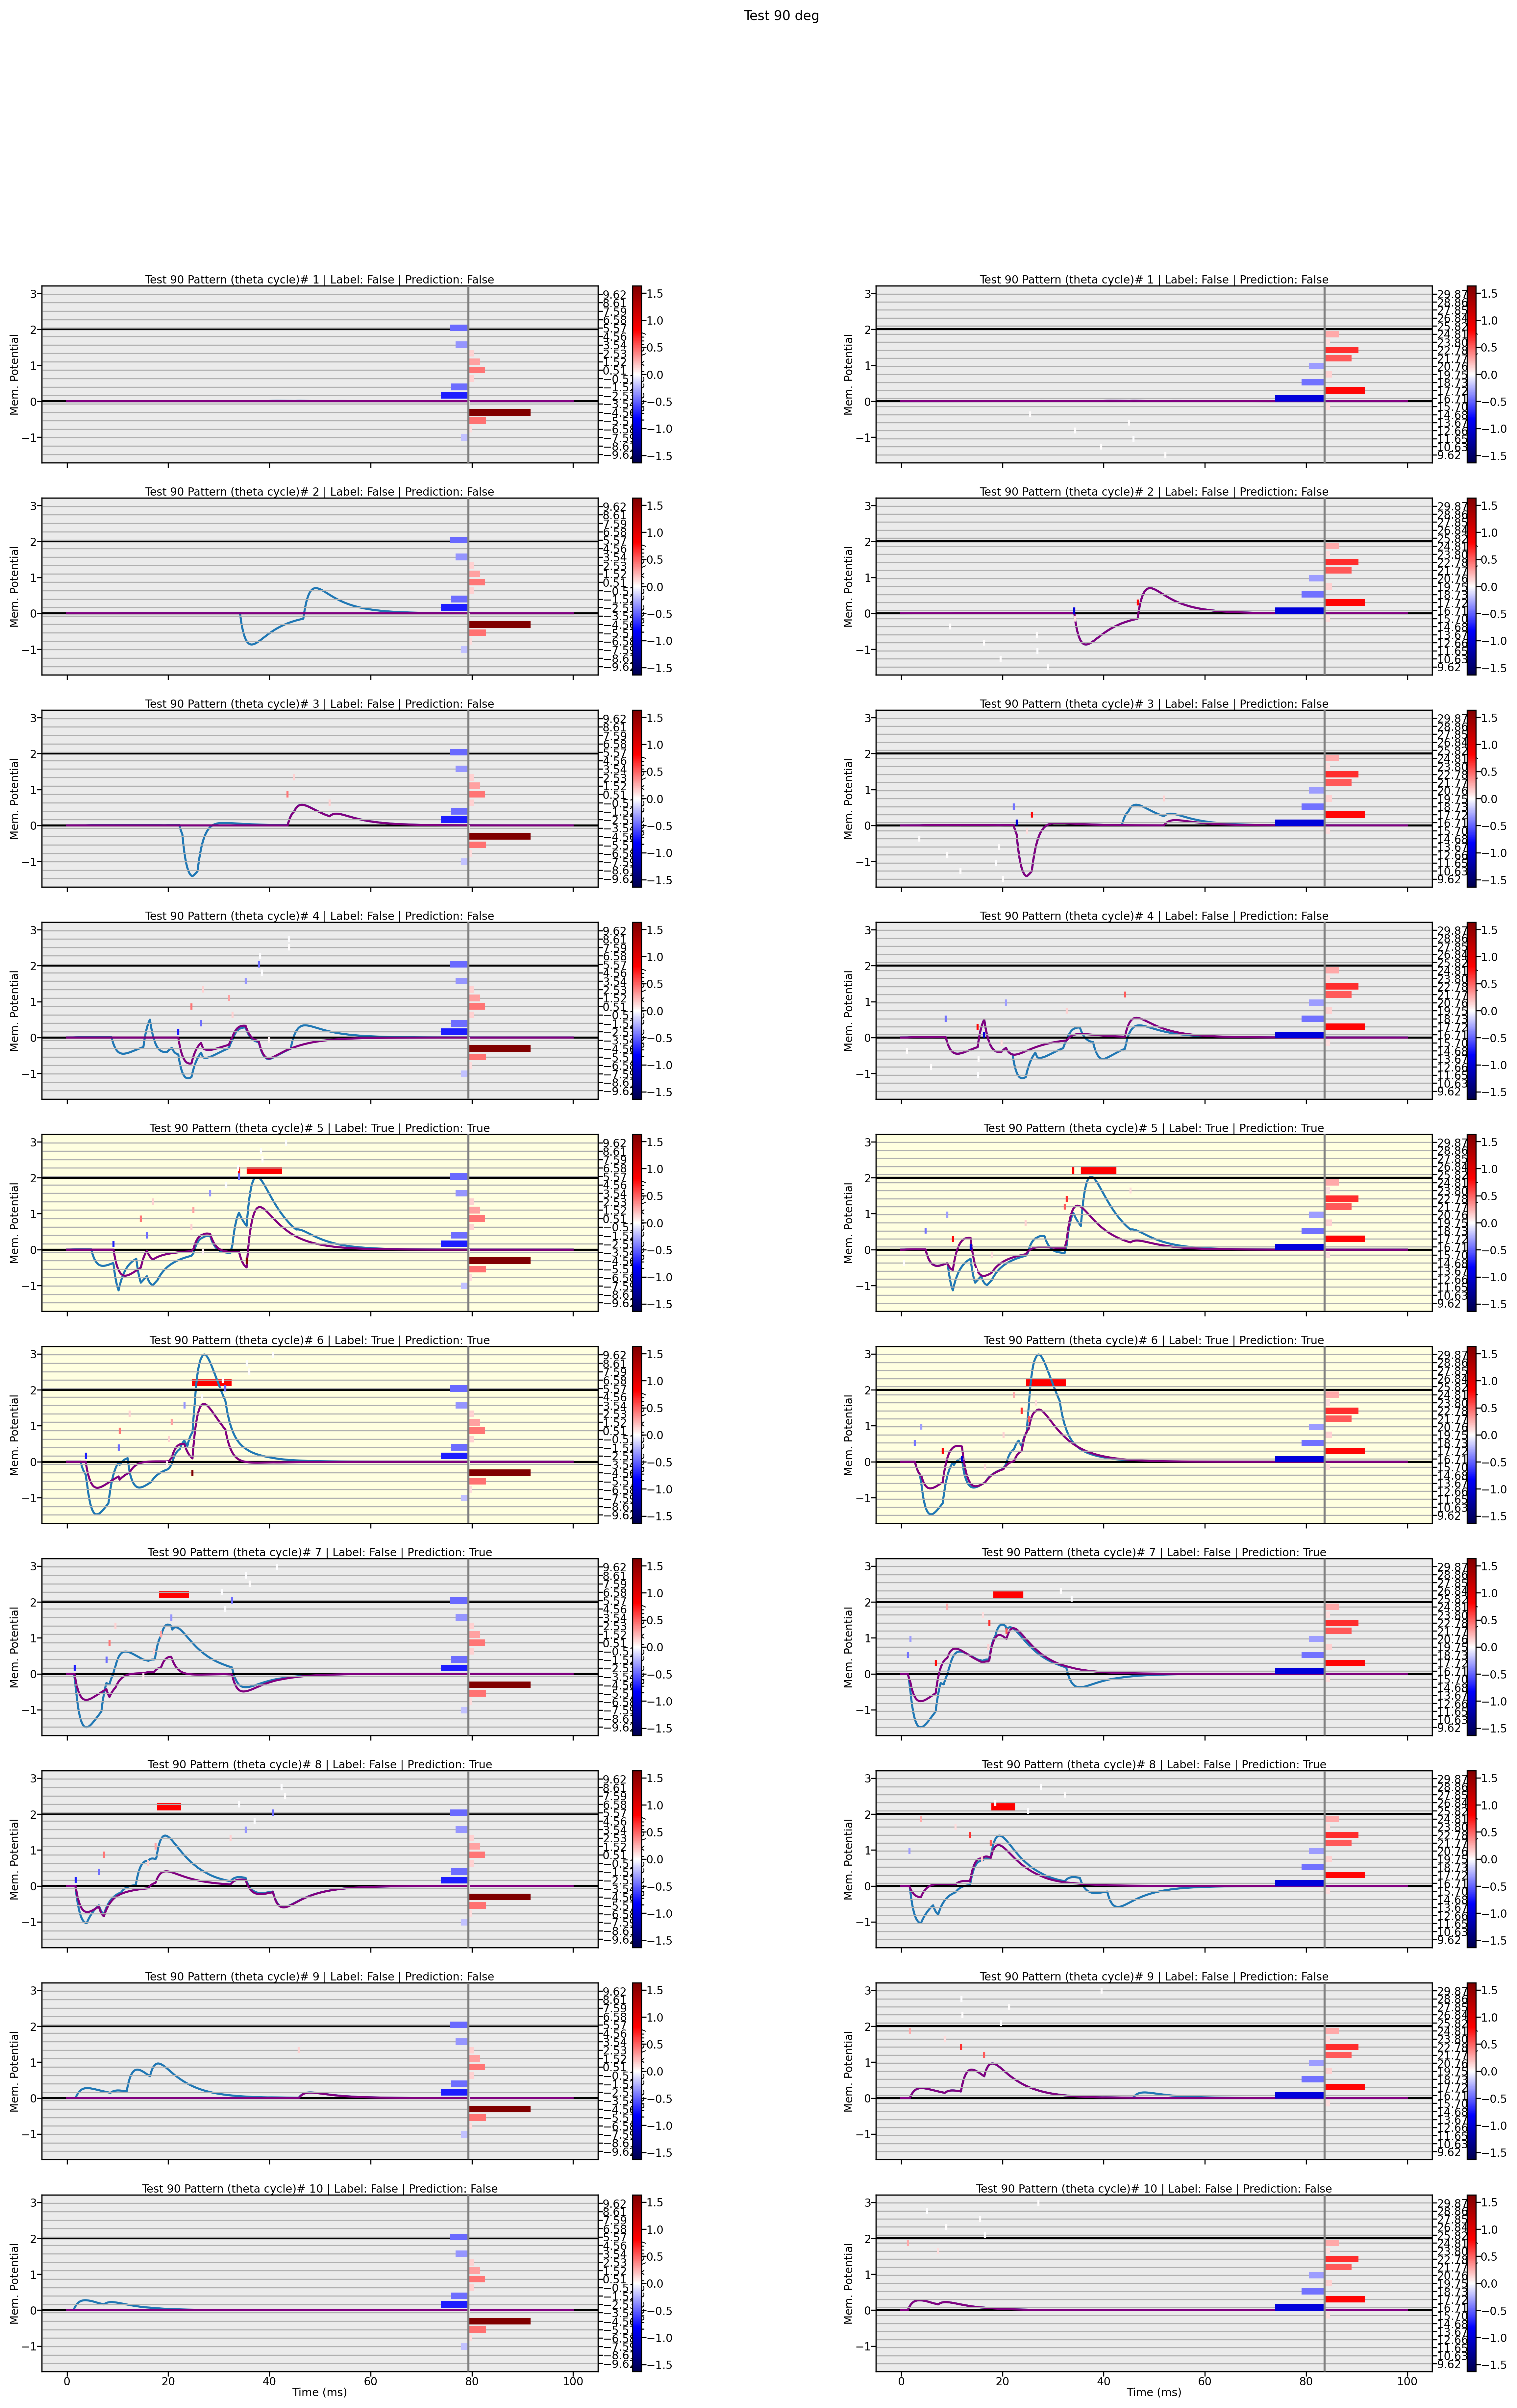

In [11]:
X_test_ori_90 = X_test_ori[trajtype_test_ori == 6]
Y_test_ori_90 = Y_test_ori[trajtype_test_ori == 6]
Y_pred_test_ori_90, kout_test_ori_90, tspout_test_ori_90, _ = temN.predict(X_test_ori_90, temN_tax)
fig, ax = plt.subplots(len(kout_test_ori_90), 2, sharex='col', sharey='col', figsize=(20, 28), facecolor='white', dpi=300)
plot_tempotron_traces(ax[:, 0], temN, X_test_ori_90, Y_test_ori_90, Y_pred_test_ori_90, tspout_test_ori_90, kout_test_ori_90,
                      temN_tax, Vthresh, nidx2widx[0], temN.w[nidx2widx[0]], xxtun1d[all_nidx_alltrajs[0]], val2cmap=val2cmap, tag='Test 90', linelength=0.75)
plot_tempotron_traces(ax[:, 1], temN, X_test_ori_90, Y_test_ori_90, Y_pred_test_ori_90, tspout_test_ori_90, kout_test_ori_90,
                      temN_tax, Vthresh, nidx2widx[1], temN.w[nidx2widx[1]], yytun1d[all_nidx_alltrajs[1]], val2cmap=val2cmap, tag='Test 90', linelength=0.75)

fig.suptitle('Test 90 deg')
fig.savefig(join(save_dir, '%s_test_trace_90.png'%(exintag)), dpi=300)

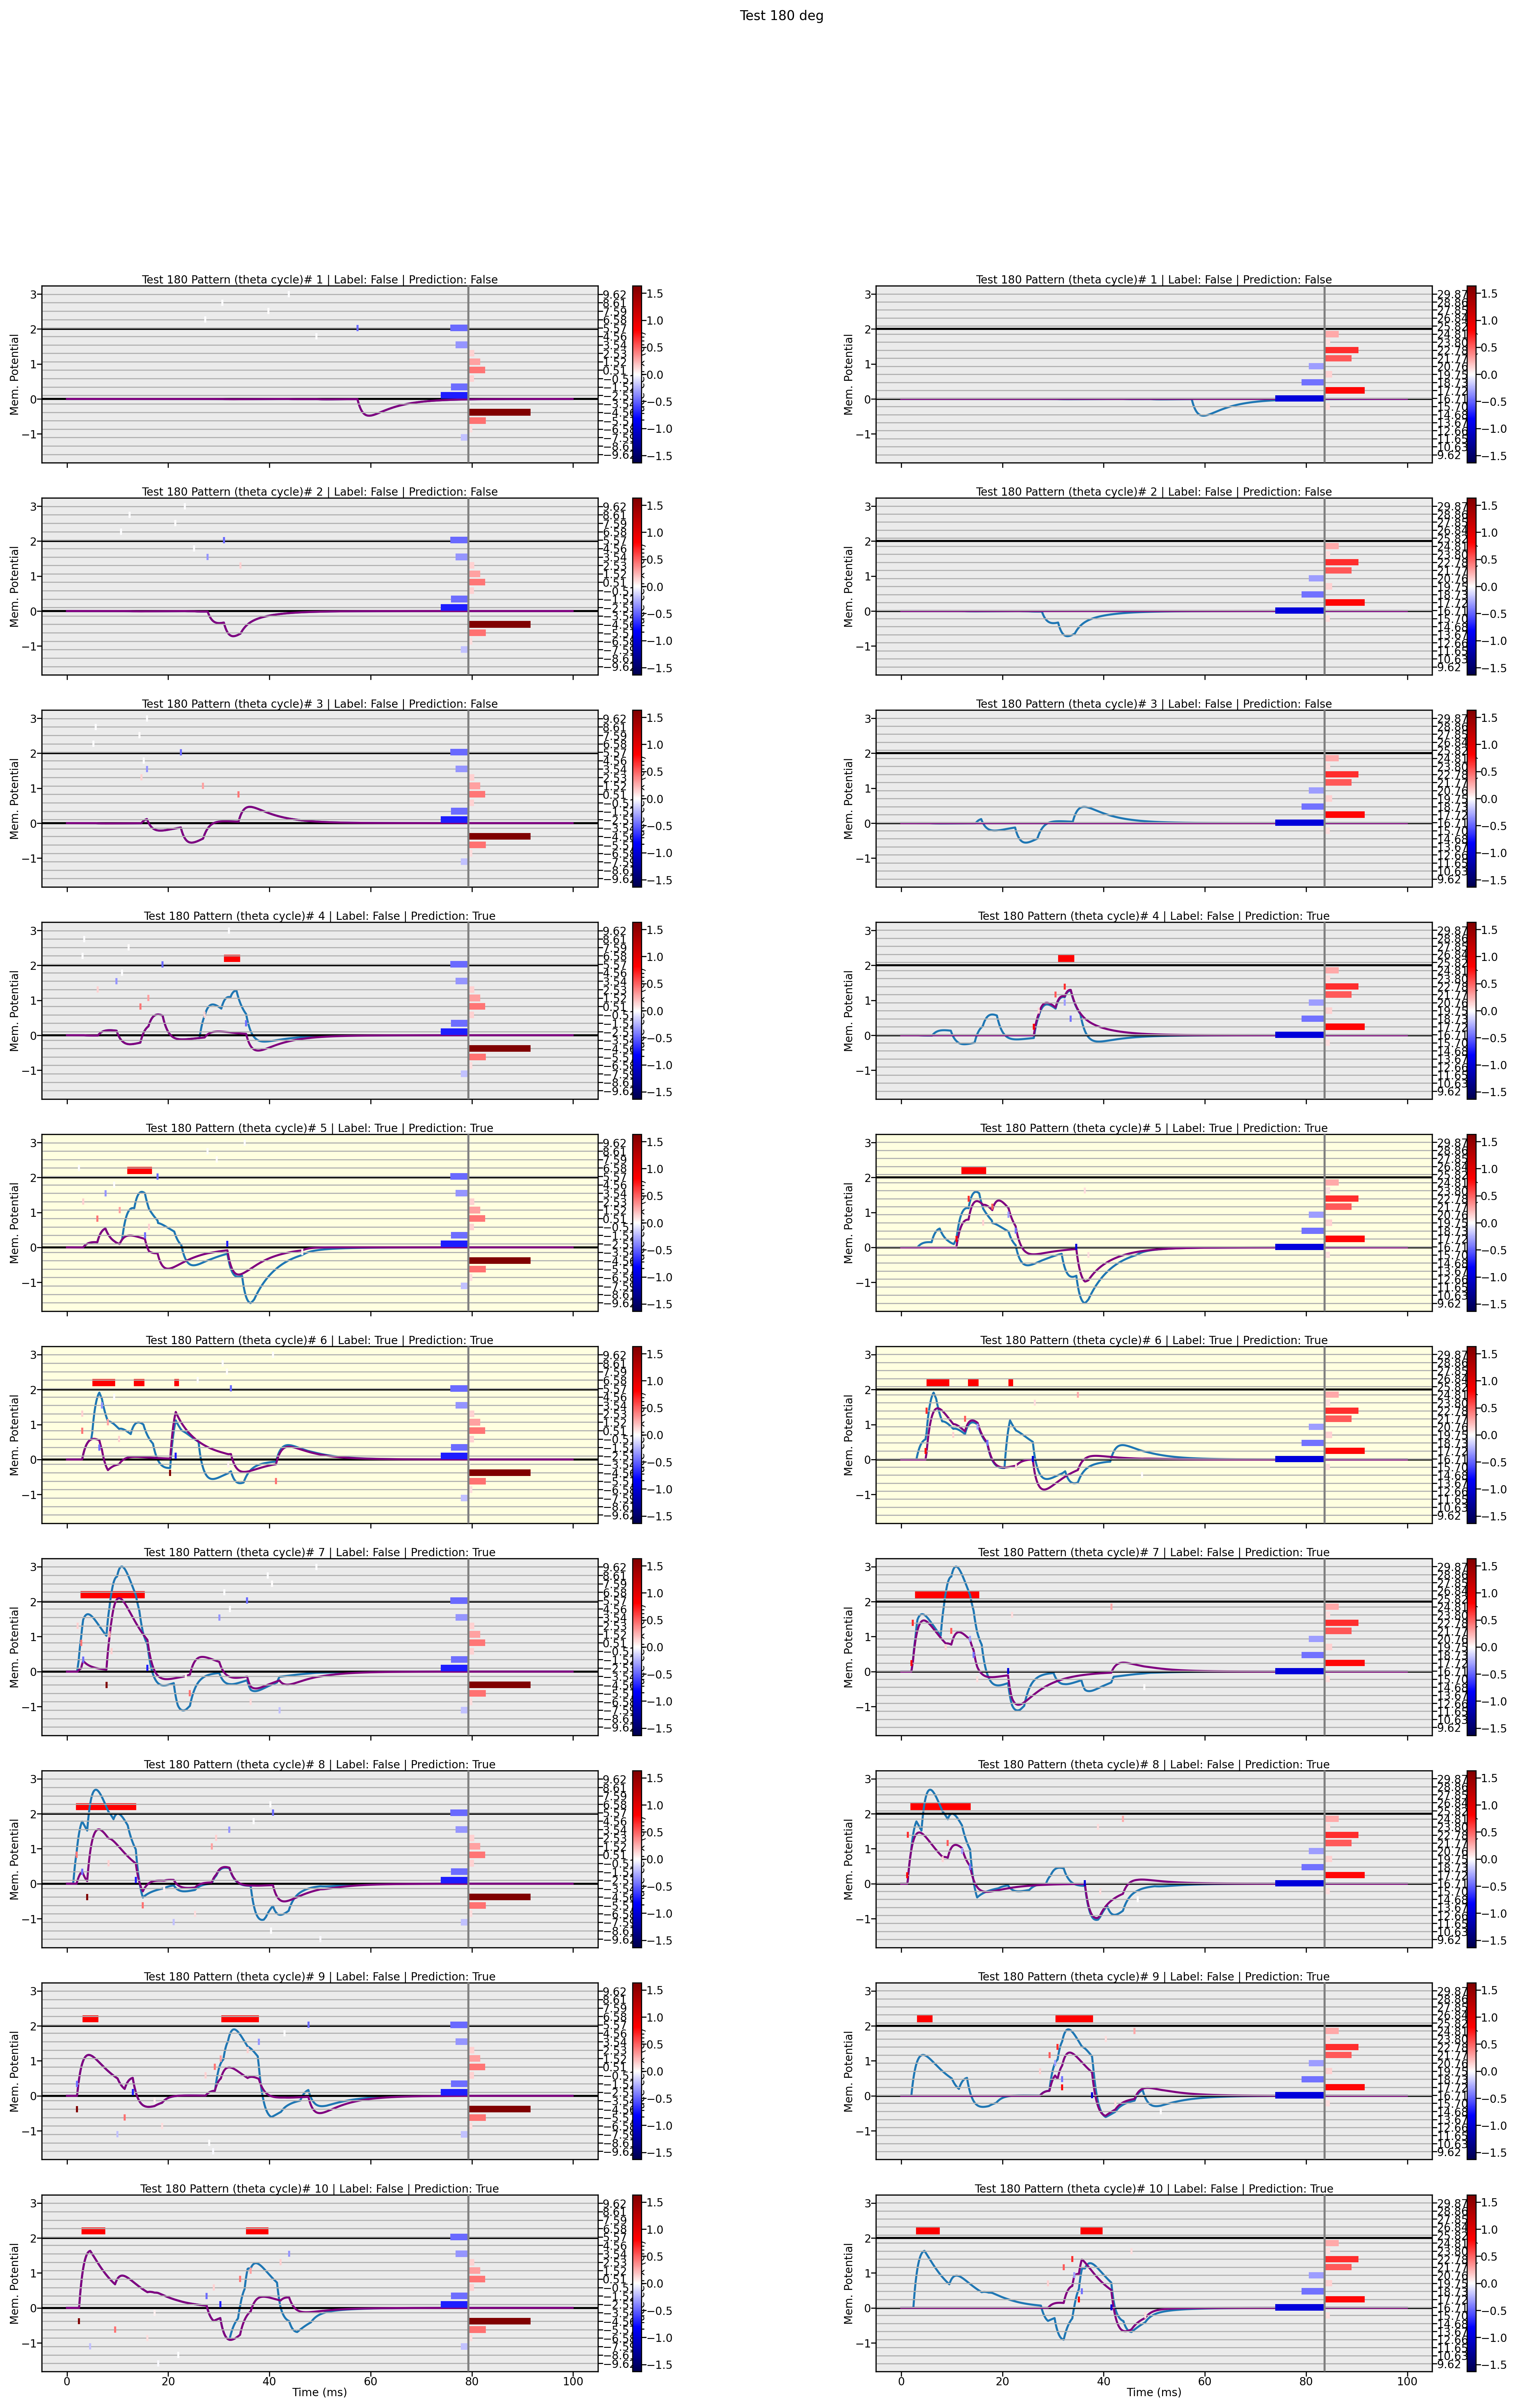

In [12]:
X_test_ori_180 = X_test_ori[trajtype_test_ori == 12]
Y_test_ori_180 = Y_test_ori[trajtype_test_ori == 12]
Y_pred_test_ori_180, kout_test_ori_180, tspout_test_ori_180, _ = temN.predict(X_test_ori_180, temN_tax)
fig, ax = plt.subplots(len(kout_test_ori_180), 2, sharex='col', sharey='col', figsize=(20, 28), facecolor='white', dpi=300)
plot_tempotron_traces(ax[:, 0], temN, X_test_ori_180, Y_test_ori_180, Y_pred_test_ori_180, tspout_test_ori_180, kout_test_ori_180,
                      temN_tax, Vthresh, nidx2widx[0], temN.w[nidx2widx[0]], xxtun1d[all_nidx_alltrajs[0]], val2cmap=val2cmap, tag='Test 180', linelength=0.75)
plot_tempotron_traces(ax[:, 1], temN, X_test_ori_180, Y_test_ori_180, Y_pred_test_ori_180, tspout_test_ori_180, kout_test_ori_180,
                      temN_tax, Vthresh, nidx2widx[1], temN.w[nidx2widx[1]], yytun1d[all_nidx_alltrajs[1]], val2cmap=val2cmap, tag='Test 180', linelength=0.75)
fig.suptitle('Test 180 deg')
fig.savefig(join(save_dir, '%s_test_trace_180.png'%(exintag)), dpi=300)

